In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
# load_data 로 train과 test 데이터 로드
(train_data, train_label), (test_data, test_label) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_data.shape

(404, 13)

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
# 데이터 전처리 끝

In [10]:
from tensorflow.keras import models, layers

In [11]:
# 모델 구성
# dense 64 relu - input_shape =  (train_data.shape[1] ???? , )  
# desne 64 relu 
# dense ?? 
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
# model compile optimizer = rmsprop, loss = mse, metics = mae 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [14]:
# 학습을 진행시키고 그 학습 히스토리를 저장하는 코드
history = model.fit(x=train_data, y=train_label, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 48ms/step - loss: 540.1313 - mae: 21.4174 - val_loss: 588.8714 - val_mae: 22.5286
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 511.2278 - mae: 20.7198 - val_loss: 563.9995 - val_mae: 21.9655
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 487.6859 - mae: 20.1313 - val_loss: 540.3476 - val_mae: 21.4163
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 464.9778 - mae: 19.5508 - val_loss: 516.1754 - val_mae: 20.8412
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 441.7303 - mae: 18.9536 - val_loss: 491.7121 - val_mae: 20.2384
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 418.1101 - mae: 18.3217 - val_loss: 465.8517 - val_mae: 19.5896
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 393.3481 - mae: 17.6462 - val_loss: 439.4393 - val_mae: 18.9341
Epoch 8/100
3/3 [==============================] - 0s 

In [15]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [16]:
# train성능 지표, validatoin 성능 지표 구성
# history 객체에서 mae, loss 추출

mae = history.history['mae']
loss = history.history['loss']

val_mae = history.history['val_mae']
val_loss = history.history['val_loss']


In [17]:
# 그래프를 그리기 위한 epoch 범위  range()
epoch = range(len(mae))

In [18]:
import matplotlib.pyplot as plt

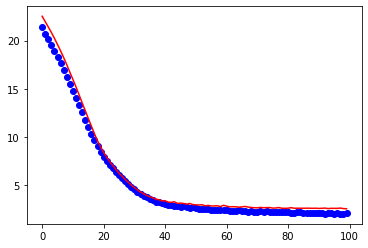

In [20]:
# train & validation mae 그래프 표시 train - bo, valid - r
plt.plot(epoch, mae, 'bo', label='train mae')
plt.plot(epoch, val_mae, 'r', label='valid mae')

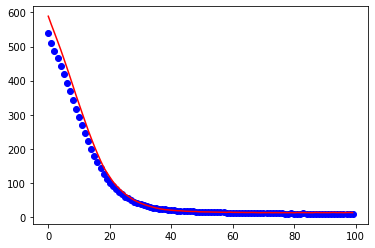

In [21]:
# train & validation loss 그래프 표시 train - bo, valid - r
plt.plot(epoch, loss, 'bo', label='train loss')
plt.plot(epoch, val_loss, 'r', label='valid loss')

In [22]:
# model 평가
model.evaluate(test_data, test_label)

4/4 [==============================] - 0s 2ms/step - loss: 24.5178 - mae: 3.1361


[24.517847061157227, 3.136141300201416]

In [26]:
sum(train_label[:50]) / 50

21.215999999999998